# Telco Customer Churn - Data explotation

This notebook aims to perform the initial data exploration. 
From the course website: the most important reasons / steps are:
- Identify quality issues (e.g. missing values, wrong measurements, …)
- Assess feature quality – how relevant is a certain measurement (e.g. use correlation matrix)
- Get an idea on the value distribution of your data using statistical measures and visualizations

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset Codebook
- customerID: Customer ID
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies :Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

## Load data

In [2]:
df = pd.read_csv('../dataset/dataset.csv')

## Dataset information

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Rows and columns

In [4]:
df.shape

(7043, 21)

### Column types

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Check for missing values
No missing values in the dataset at first glance.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Casting variables to appropriate types

In [7]:
# SeniorCitizen variable type will be changed from int to string to ease visualization later
df['SeniorCitizen']=df['SeniorCitizen'].apply(str)
d = {'1': 'Yes', '0': 'No'}
df['SeniorCitizen']=df['SeniorCitizen'].map(d)
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [8]:
# TotalCharges variable type will be changed from string to float
# Error when parsing strings due to empty strings in the TotalCharges column
# ValueError: Unable to parse string " " at positions 488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754

empty_total_charges = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
df.loc[empty_total_charges,'TotalCharges'] = 0
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [9]:
# Churn variable from string to bool
d = {'Yes': True, 'No': False}
df['Churn']=df['Churn'].map(d)

### Statistics of the numeric columns
Take TotalCharges statistics (specially min) with a grain of salt for now, because empty strings were replaced with zeros above.

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Distributions of the relevant non-numeric columns

In [11]:
# identify non-numeric columns
column_names = list(df.dtypes.index)
non_numeric_columns = [var for var in column_names if df[var].dtype == 'object' or df[var].dtype == 'bool' ]
print(non_numeric_columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [12]:
# print counts of non_numeric_features, except the customerID variable
for var in non_numeric_columns[1:]:
    print('\n<---- ')
    print(df[var].value_counts())
    print('---->\n')


<---- 
Male      3555
Female    3488
Name: gender, dtype: int64
---->


<---- 
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
---->


<---- 
No     3641
Yes    3402
Name: Partner, dtype: int64
---->


<---- 
No     4933
Yes    2110
Name: Dependents, dtype: int64
---->


<---- 
Yes    6361
No      682
Name: PhoneService, dtype: int64
---->


<---- 
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---->


<---- 
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
---->


<---- 
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
---->


<---- 
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
---->


<---- 
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
---->


<---- 
N

## Data exploration

### Correlation matrix 

In [13]:
corr = df.drop(non_numeric_columns, axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


### Correlation of features with dependent variable - churn

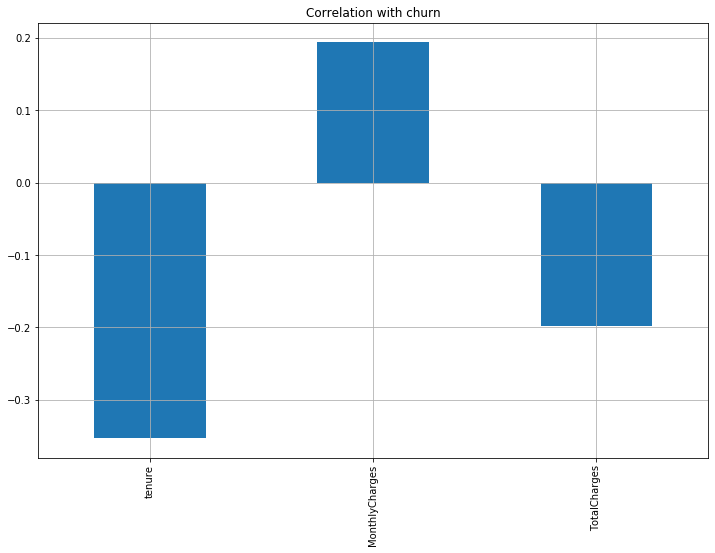

In [14]:
df.drop(non_numeric_columns, axis=1).corrwith(df.Churn).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with churn")

### Histograms of numeric variables

In [15]:
numeric_variables = [x for x in column_names if str(df[x].dtype) == 'float64' or str(df[x].dtype) == 'int64']

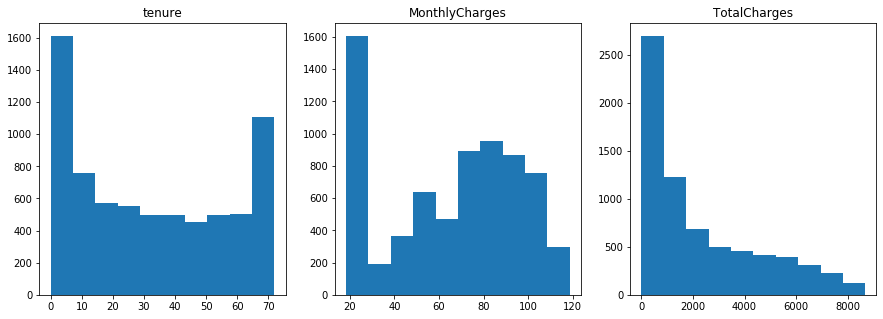

In [16]:
f, ax = plt.subplots(1, 3, figsize=(15,5))

# subplots containing histograms of the numeric variables
for idx, var in enumerate(numeric_variables):
    x = idx % 3
    ax[x].hist(df[var])
    ax[x].title.set_text(var)
   
plt.subplots_adjust(hspace=0.5)
plt.show()

### Bar plots showing categorical variables and relationship with churn

In [17]:
# function to display bar plots showing the relationship of individual non-numeric features and Churn
def plot_churn(var):
    grouped = df[[var,'Churn']].groupby([var,'Churn']).size()

    aux1 = grouped[:, False].index.tolist()
    aux2 = grouped[:, True].index.tolist()
    assert aux1 == aux2
    
    labels = grouped[:, False].index.tolist()
    churn = grouped[:,True].values
    no_churn = grouped[:,False].values
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(8,6))
    
    ax.bar(labels, churn, width, label='Churn')
    ax.bar(labels, no_churn, width, bottom=churn, label='No churn')
    ax.set_ylabel('Counts')
    ax.set_title('Counts by ' + var + ' and Churn')
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    

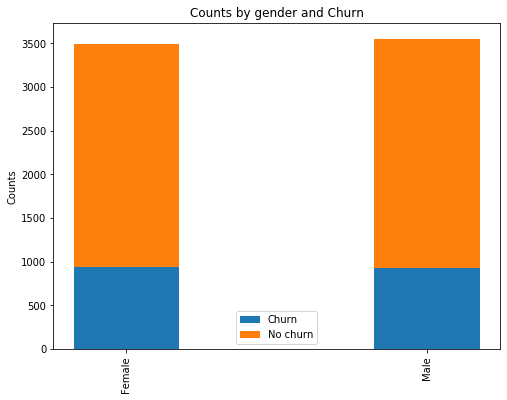

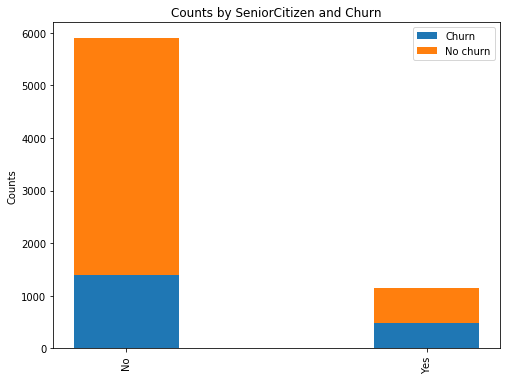

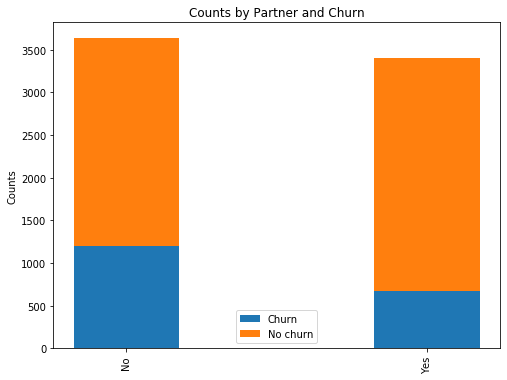

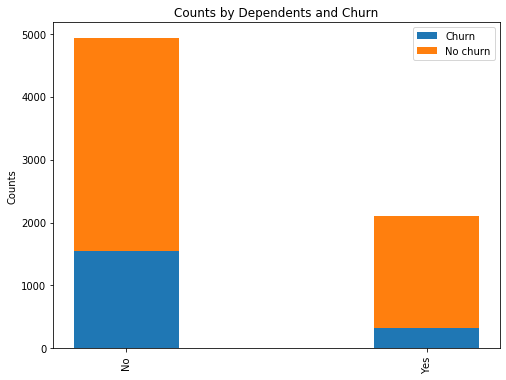

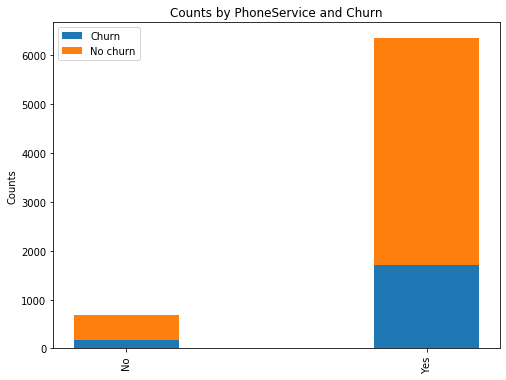

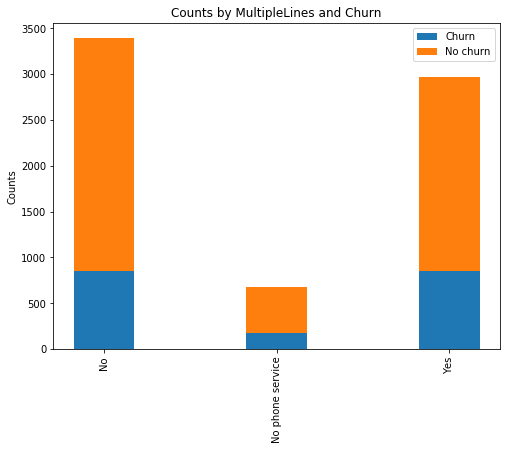

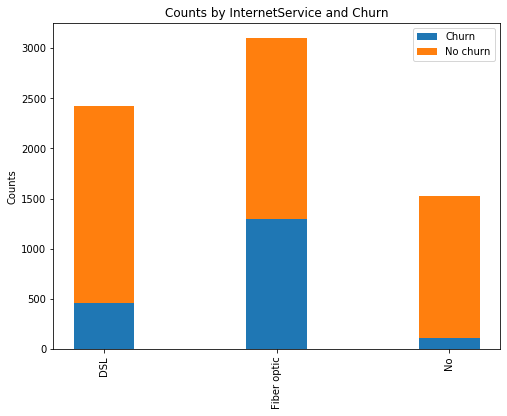

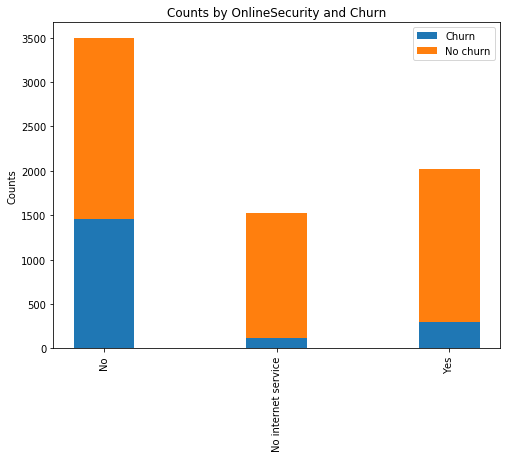

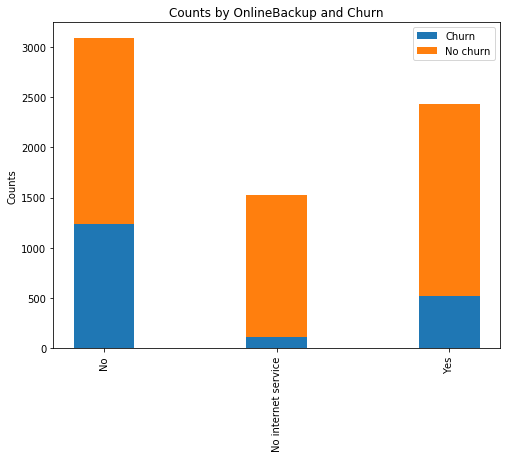

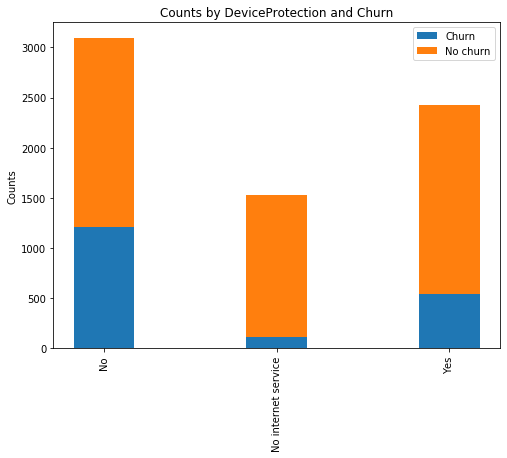

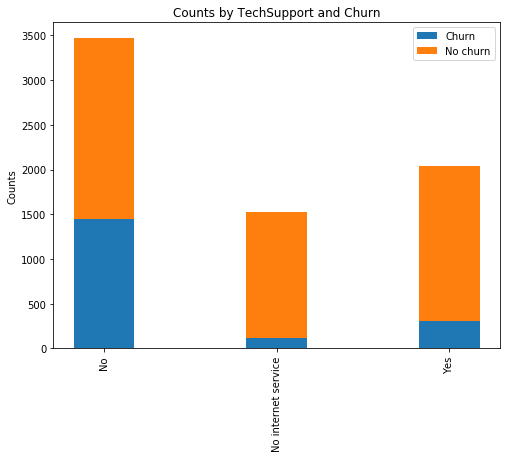

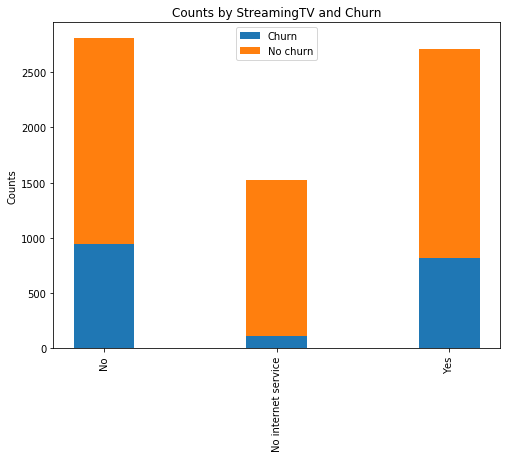

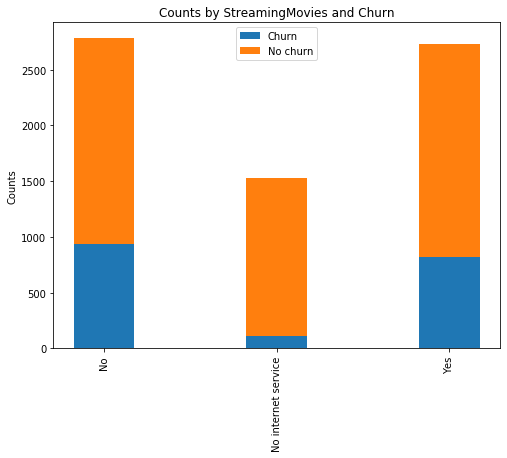

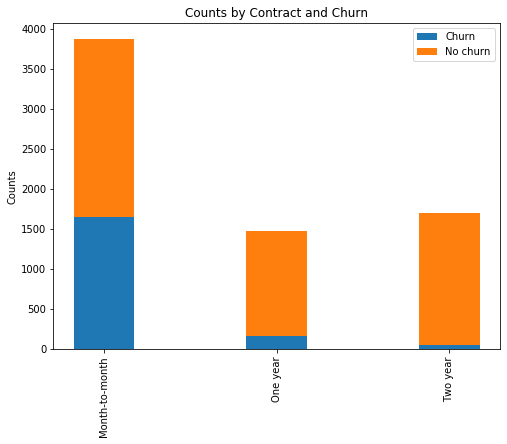

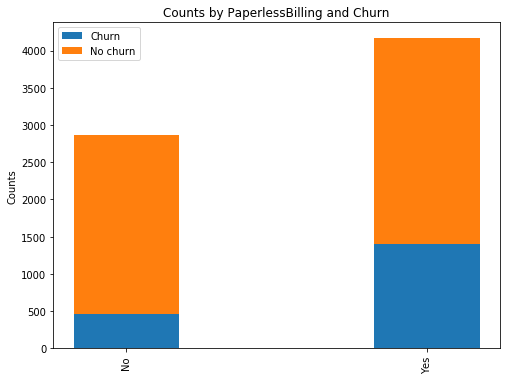

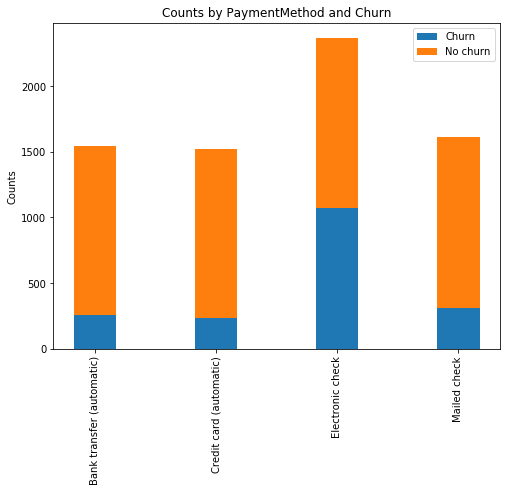

In [18]:
# plot charts for all non numeric columns except customerID and Churn
for var in non_numeric_columns[1:-1]:
    plot_churn(var)